
# Project: Investigate a TMDB Dataset
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project, we are analyzing a dataset from TMDB Database that includes details on 10,000 films. Our objective is to examine this data in order to gain knowledge of the elements—like revenue and popularity—that go into developing a successful picture, knowledge that will help the film industry make decisions.

### Dataset Description 

This data collection includes user ratings and revenue information for 10,000 movies that were gathered from The Movie Database (TMDb).

There are 21 columns in this data set:

id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj

### Question(s) for Analysis
Which cast are most popular from year to year?

How does the popularity of the cast affect the movie's revenue?


In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [169]:
df = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling


In [170]:
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  \
0              The park is open.   
1             What a Lovely Day.   
2     One Choice Can Destroy You   
3  Every generation has a story.   
4            Vengeance Hits Home   

                                            keywords  \
0  monster|dna|tyrannosaurus rex|velociraptor|island   
1   future|chase|post-apocalyptic|dystopia|australia   
2  based on novel|revolution|dystopia|sequel|dyst...   
3              android|spaceship|jedi|space opera|3d   
4                car race|speed|revenge|suspense|car   

                                            overview  runtime  \
0  Twenty-two years after the events of Jurassic ...      124   
1  An apocalyptic story set in the furthest reach...      120   
2  Beatrice Prior must confront her inner demons ...      119   
3  Thirty years after defeating the Galactic Empi...      136   
4  Deckard Shaw seeks revenge against Dominic Tor...      137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15        5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15        2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09

### Data Cleaning


Taking a look before deleteing 

In [174]:
df.describe()

id    popularity       runtime    vote_count  vote_average  \
count   10866.000000  10866.000000  10866.000000  10866.000000  10866.000000   
mean    66064.177434      0.646441    102.070863    217.389748      5.974922   
std     92130.136561      1.000185     31.381405    575.619058      0.935142   
min         5.000000      0.000065      0.000000     10.000000      1.500000   
25%     10596.250000      0.207583     90.000000     17.000000      5.400000   
50%     20669.000000      0.383856     99.000000     38.000000      6.000000   
75%     75610.000000      0.713817    111.000000    145.750000      6.600000   
max    417859.000000     32.985763    900.000000   9767.000000      9.200000   

       release_year    budget_adj   revenue_adj  
count  10866.000000  1.086600e+04  1.086600e+04  
mean    2001.322658  1.755104e+07  5.136436e+07  
std       12.812941  3.430616e+07  1.446325e+08  
min     1960.000000  0.000000e+00  0.000000e+00  
25%     1995.000000  0.000000e+00  0.000000e+00  
50%     2006.000000  0.000000e+00  0.000000e+00  
75%     2011.000000  2.085325e+07  3.369710e+07  
max     2015.000000  4.250000e+08  2.827124e+09

In [175]:
print(df['budget_adj'].mean())

17551039.82288678


In [176]:
df['budget_adj'] = df['budget_adj'].replace(0, 17551039.822886847)

In [177]:
print(df['revenue_adj'].mean())

51364363.25325099


In [178]:
df['revenue_adj'] = df['revenue_adj'].replace(0, 51364363.25325093)

In [179]:
print(df['runtime'].mean())

102.07086324314375


In [180]:
df['runtime'] = df['runtime'].replace(0, 102.07086324314375)
df.describe()

id    popularity       runtime    vote_count  vote_average  \
count   10866.000000  10866.000000  10866.000000  10866.000000  10866.000000   
mean    66064.177434      0.646441    102.362065    217.389748      5.974922   
std     92130.136561      1.000185     30.902781    575.619058      0.935142   
min         5.000000      0.000065      2.000000     10.000000      1.500000   
25%     10596.250000      0.207583     90.000000     17.000000      5.400000   
50%     20669.000000      0.383856     99.000000     38.000000      6.000000   
75%     75610.000000      0.713817    111.000000    145.750000      6.600000   
max    417859.000000     32.985763    900.000000   9767.000000      9.200000   

       release_year    budget_adj   revenue_adj  
count  10866.000000  1.086600e+04  1.086600e+04  
mean    2001.322658  2.675136e+07  7.980243e+07  
std       12.812941  3.050850e+07  1.365610e+08  
min     1960.000000  9.210911e-01  2.370705e+00  
25%     1995.000000  1.755104e+07  5.136436e+07  
50%     2006.000000  1.755104e+07  5.136436e+07  
75%     2011.000000  2.085325e+07  5.136436e+07  
max     2015.000000  4.250000e+08  2.827124e+09

Check for any duplicates and remove them

In [181]:
sum(df.duplicated())

1

In [182]:
df.drop_duplicates(inplace=True)

Checking for data types

In [183]:
df.dtypes

id                        int64
popularity              float64
original_title           object
cast                     object
director                 object
runtime                 float64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

How many nulls we have

In [185]:
df.isnull().sum()


id                         0
popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Droping unnesscary columns 

In [ ]:
df=df.drop(['budget','revenue','imdb_id','homepage','tagline','keywords','overview'], axis=1)


filling null with 'unknown' 

In [29]:
df.fillna('unknown', inplace=True)
df.isnull().sum().sum()

0

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   popularity      10865 non-null  float64
 2   original_title  10865 non-null  object 
 3   cast            10865 non-null  object 
 4   director        10865 non-null  object 
 5   runtime         10865 non-null  float64
 6   genres          10865 non-null  object 
 7   release_date    10865 non-null  object 
 8   vote_count      10865 non-null  int64  
 9   vote_average    10865 non-null  float64
 10  release_year    10865 non-null  int64  
 11  budget_adj      10865 non-null  float64
 12  revenue_adj     10865 non-null  float64
dtypes: float64(5), int64(3), object(5)
memory usage: 1.2+ MB


rename budget_adj and revenue_adj to just budget and revunue respectively and to add a profit column that is equal to revenuee subtracted by budget

In [187]:
df.rename({'budget_adj':'budget', 'revenue_adj':'revenue'}, axis=1, inplace=True)
df['profit']=df['revenue']-df['budget']

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Replace this header name!)

In [32]:
df.describe()

id    popularity       runtime    vote_count  vote_average  \
count   10865.000000  10865.000000  10865.000000  10865.000000  10865.000000   
mean    66066.374413      0.646446    102.363019    217.399632      5.975012   
std     92134.091971      1.000231     30.904043    575.644627      0.935138   
min         5.000000      0.000065      2.000000     10.000000      1.500000   
25%     10596.000000      0.207575     90.000000     17.000000      5.400000   
50%     20662.000000      0.383831     99.000000     38.000000      6.000000   
75%     75612.000000      0.713857    111.000000    146.000000      6.600000   
max    417859.000000     32.985763    900.000000   9767.000000      9.200000   

       release_year        budget       revenue        profit  
count  10865.000000  1.086500e+04  1.086500e+04  1.086500e+04  
mean    2001.321859  2.675107e+07  7.980968e+07  5.305862e+07  
std       12.813260  3.050989e+07  1.365652e+08  1.206781e+08  
min     1960.000000  9.210911e-01  2.370705e+00 -4.139124e+08  
25%     1995.000000  1.755104e+07  5.136436e+07  2.017774e+07  
50%     2006.000000  1.755104e+07  5.136436e+07  3.381332e+07  
75%     2011.000000  2.085325e+07  5.136436e+07  3.904948e+07  
max     2015.000000  4.250000e+08  2.827124e+09  2.750137e+09

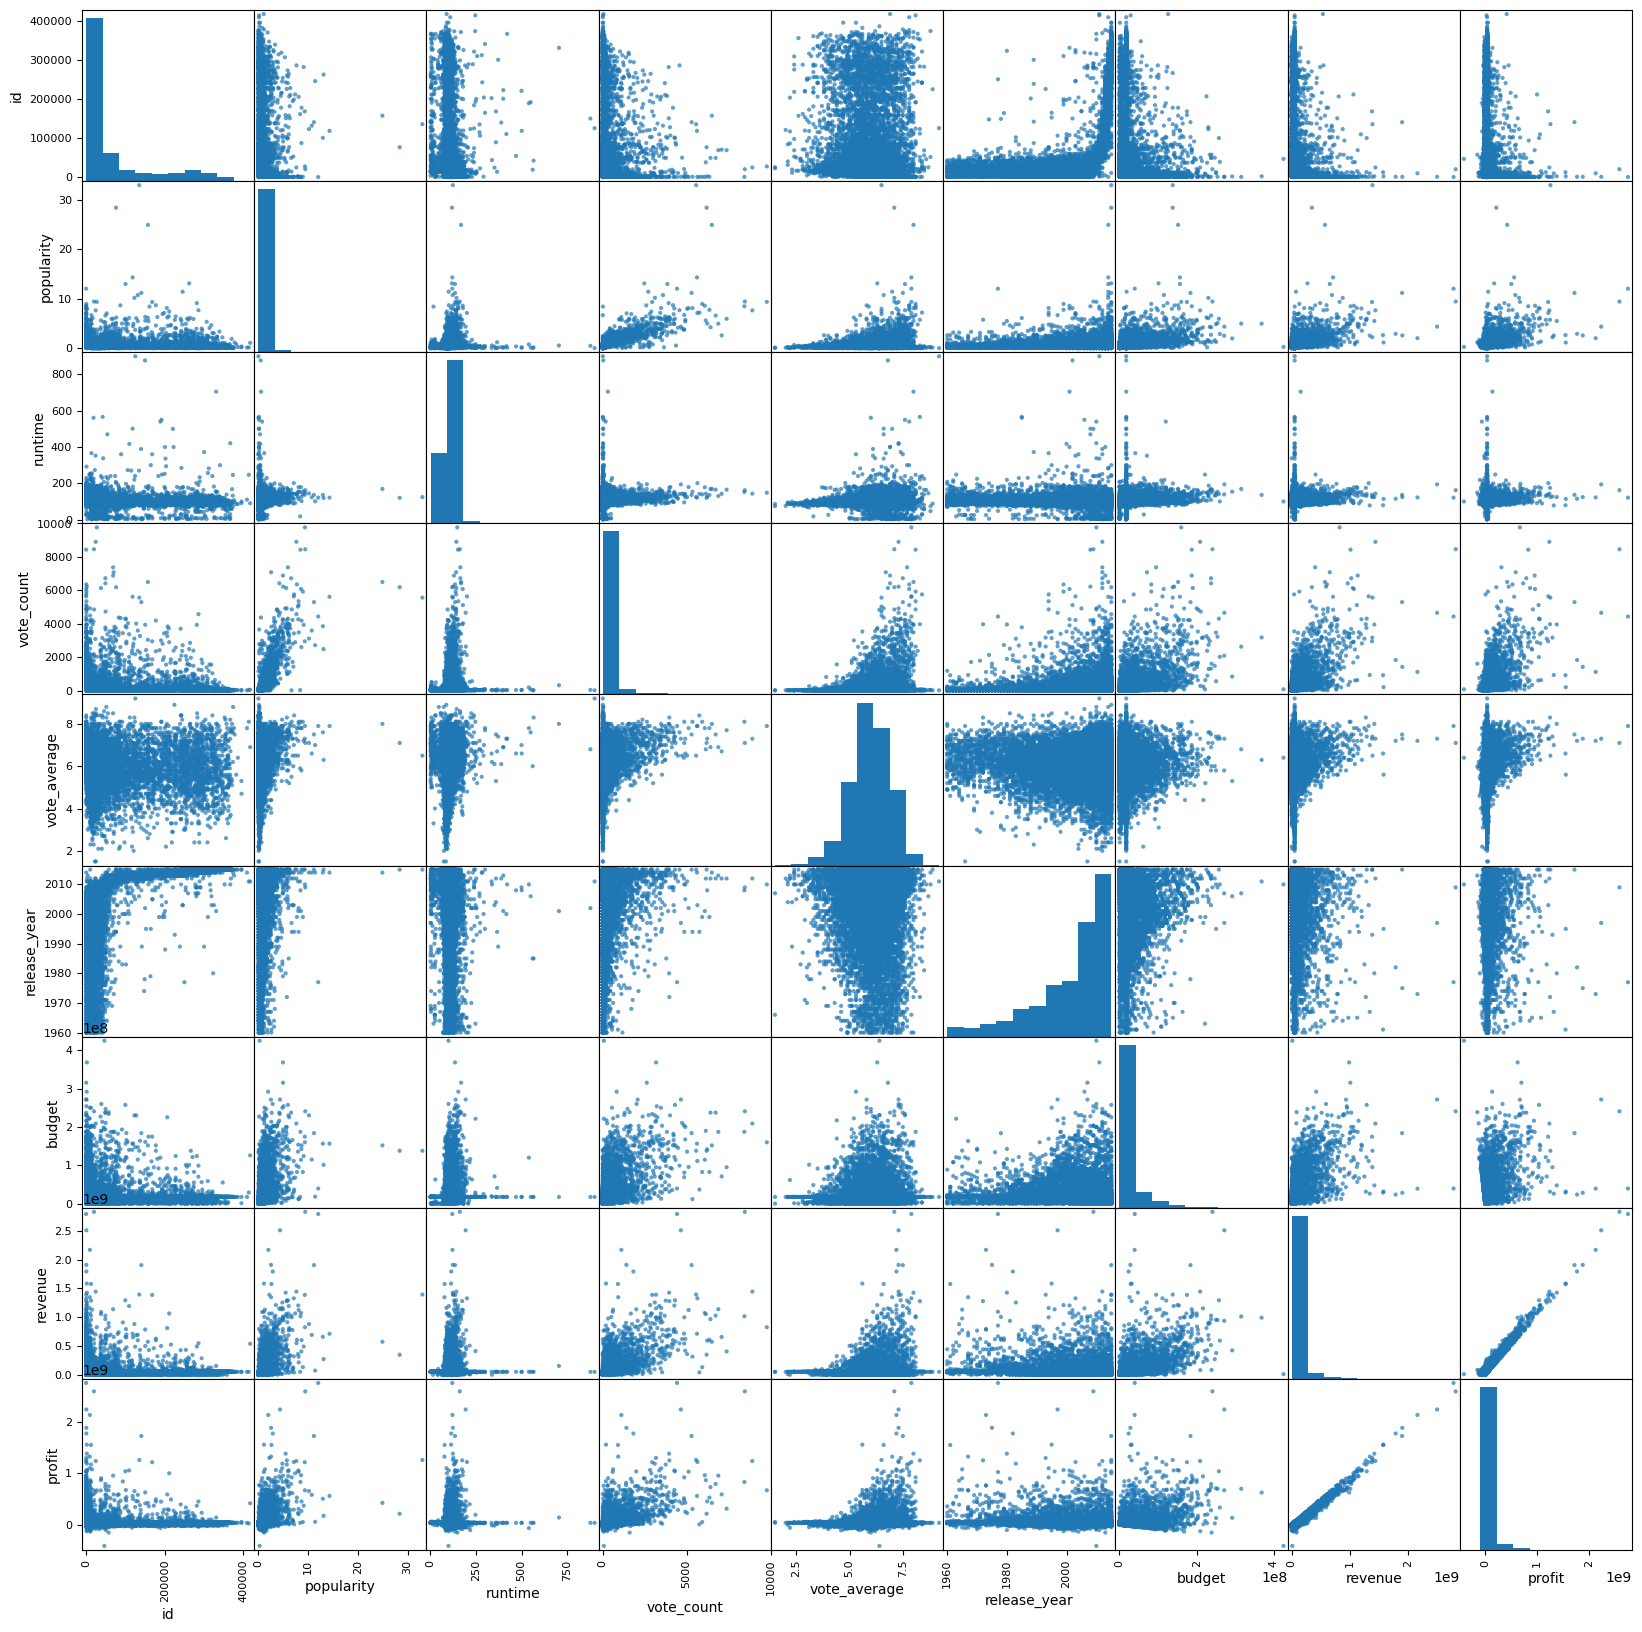

In [33]:
pd.plotting.scatter_matrix(df,alpha = 0.7, figsize= (20,20), grid=True );


The analysis of the figures reveals two main findings: Firstly, there's a strong correlation between profit and revenue, regardless of budget, suggesting that a significant portion of the budget may not contribute to revenue. Secondly, there's a noticeable relationship between movie ID and release year, indicating that newer movies tend to have higher ID numbers, and there's been an exponential increase in the number of movies produced since around 2010.

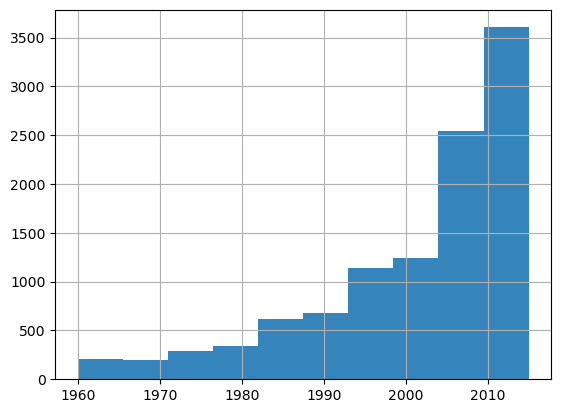

In [34]:
df['release_year'].hist(alpha=0.9);

Every movie has many cast members we will need to split that column and the explode

In [35]:
df1=df

In [51]:
df1 = df1.assign(cast=df1.cast.str.split('|')).explode('cast')
df1.head()

id  popularity  original_title                 cast         director  \
0  135397   32.985763  Jurassic World          Chris Pratt  Colin Trevorrow   
0  135397   32.985763  Jurassic World  Bryce Dallas Howard  Colin Trevorrow   
0  135397   32.985763  Jurassic World          Irrfan Khan  Colin Trevorrow   
0  135397   32.985763  Jurassic World    Vincent D'Onofrio  Colin Trevorrow   
0  135397   32.985763  Jurassic World        Nick Robinson  Colin Trevorrow   

   runtime                                     genres release_date  \
0    124.0  Action|Adventure|Science Fiction|Thriller       6/9/15   
0    124.0  Action|Adventure|Science Fiction|Thriller       6/9/15   
0    124.0  Action|Adventure|Science Fiction|Thriller       6/9/15   
0    124.0  Action|Adventure|Science Fiction|Thriller       6/9/15   
0    124.0  Action|Adventure|Science Fiction|Thriller       6/9/15   

   vote_count  vote_average  release_year        budget       revenue  \
0        5562           6.5          2015  1.379999e+08  1.392446e+09   
0        5562           6.5          2015  1.379999e+08  1.392446e+09   
0        5562           6.5          2015  1.379999e+08  1.392446e+09   
0        5562           6.5          2015  1.379999e+08  1.392446e+09   
0        5562           6.5          2015  1.379999e+08  1.392446e+09   

         profit  
0  1.254446e+09  
0  1.254446e+09  
0  1.254446e+09  
0  1.254446e+09  
0  1.254446e+09

In [52]:
df_cast_popularity=df1.groupby(['cast'],as_index=False)['popularity'].mean().sort_values(by=['popularity'])
df_cast_popularity

cast  popularity
14539      Philip Casnoff    0.000065
6293        Genie Francis    0.000065
874          Andrea Bowen    0.000620
12687  Michael J. Willett    0.000620
13155        Molly Tarlov    0.000620
...                   ...         ...
15889         Ryan Potter    8.691294
4037        Daniel Henney    8.691294
7182     Hugh Keays-Byrne   10.211471
3898         Daisy Ridley   11.173104
9429          Josh Helman   28.419936

[19027 rows x 2 columns]

In [53]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [54]:
df_cast_popularity=df1.groupby(['cast'],as_index=False)['popularity'].mean().sort_values(by=['popularity'])
df_cast_popularity

cast  popularity
14539                      Philip Casnoff    0.000065
6293                        Genie Francis    0.000065
874                          Andrea Bowen    0.000620
12687                  Michael J. Willett    0.000620
13155                        Molly Tarlov    0.000620
17446                         Tara Sharma    0.001115
13436                       Navin Nischol    0.001115
18936                         Zana Briski    0.001117
1577                               Avijit    0.001117
11620                              Mamuni    0.001117
6263                           Geeta Masi    0.001117
10464                               Kochi    0.001117
12751                    Michael Peterson    0.001315
1849                    BenjamÃ­n VicuÃ±a    0.001317
11236                        Lola DueÃ±as    0.001317
18002                Tony Curtis Blondell    0.001349
10470                          Kori Cioca    0.001372
5363                          Elle Helmer    0.001372
8537                       Jessica Hinves    0.001372
1364                          Ariana Klay    0.001372
6845                        Hannah Sewell    0.001372
1556                     Austin Highsmith    0.001423
5838                        Federica Moro    0.001567
3296                    Christian De Sica    0.001567
8451                          Jerry CalÃ     0.001567
12159                       Massimo Boldi    0.001567
13184                 Montserrat CaballÃ©    0.001635
11368                   Luciano Pavarotti    0.001635
18871                        Yusef Salaam    0.001783
1327                        Antron McCray    0.001783
10336                         Kharey Wise    0.001783
10315                    Kevin Richardson    0.001783
14902                     Raymond Santana    0.001783
5795                  Fabrizio Bracconeri    0.002120
13387                       Natasha Hovey    0.002120
6563                         Glenn Saxson    0.002120
3286                      Christian Borle    0.002165
10710                       Laura Benanti    0.002165
9563                           Judy Reyes    0.002262
8659                           Jimmy Clem    0.002381
8617                            Jim Citty    0.002381
4490                           Dawn Wells    0.002381
13003                         Mike Pearce    0.002514
8413                         Jeremy Hardy    0.002514
9186                         Johnny White    0.002514
14655                        Powell Jones    0.002514
12549                   Michael Airington    0.002599
8230                          Jeff Hiller    0.002599
17718                            Tim Gunn    0.002599
13632            Nicole Alexandra Shipley    0.002648
4282                       David Chokachi    0.002648
7960                           Jared Cohn    0.002648
7558                         Jackie Moore    0.002648
15413                      Robert Moloney    0.002719
6239                       Gaspard Proust    0.002922
1172                        Anne Gee Byrd    0.003066
15983                          Sam Eidson    0.003066
6183                       Garrett Graham    0.003066
3850                       Cyndi Williams    0.003066
2455                        Brock England    0.003066
8119                        Jean Brassard    0.003311
15910                   S. Lue McWilliams    0.003311
13723                           Noah Bean    0.003311
18262                      Valeria Marini    0.003456
5547                       Enzo Iacchetti    0.003456
12360                            Max Pisu    0.003456
14978                     Reginaldo Faria    0.003461
980                      AndrÃ©a BeltrÃ£o    0.003461
11817                      Marieta Severo    0.003461
4080                   Daniel de Oliveira    0.003461
5535                     EmÃ­lio de Mello    0.003461
3467                     Chuck Klosterman    0.003479
14046                         Pat Mahoney    0.003479
18189                          Tyler Pope

In [81]:
df_cast_popularity_filtered = df_cast_popularity[df_cast_popularity['popularity'] >= 5.1]

In [82]:
print(df_cast_popularity_filtered)

                        cast  popularity
14509         Phaldut Sharma    5.242753
4209           Dave Bautista    5.309473
13916          Oona Laurence    5.337064
17668        Thomas Robinson    5.462138
14779         Raffey Cassidy    5.462138
10313             Kevin Rahm    5.522641
3246             Chris Pratt    5.594719
15168  Richard S. Castellano    5.738034
348            Alan Ritchson    5.787396
2539     Bryce Dallas Howard    5.876791
3158            Choi Min-sik    5.947136
9606       Julian Rhind-Tutt    5.947136
5265                Eli Roth    6.098027
16128        Santino Fontana    6.112766
16819          Sonoya Mizuno    6.118847
16474           Shane Brolly    6.177761
7370             Irrfan Khan    6.211766
2805             Carrie Coon    6.438727
17620             Theo James    6.767697
13581          Nick Robinson    6.882972
2069            Blake Cooper    7.137273
10341            Ki Hong Lee    7.137273
1229            Ansel Elgort    7.703183
6569           G

In [156]:
x1_filtered = df_cast_popularity_filtered['cast']
y1_filtered = df_cast_popularity_filtered['popularity']

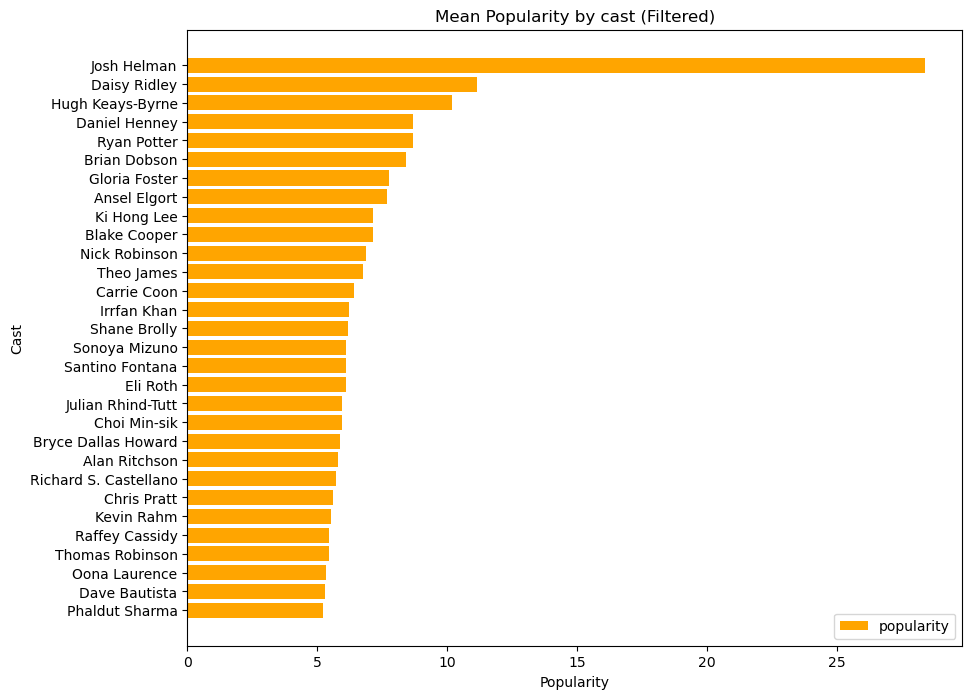

In [161]:
def barh_plot(arg):
    plt.figure(figsize=(10,8))
    plt.barh(x1_filtered, y1_filtered, color="orange", label=arg)
    plt.legend()
    plt.xlabel(f'{arg.title()}')
    plt.ylabel('Cast')
    plt.title(f'Mean {arg.title()} by cast (Filtered)')
    plt.show()

barh_plot('popularity')

The most popular cast is Josh Helman followed by Daisy Ridley

In [163]:
df_cast_profit = df1.groupby('cast', as_index=False)['profit'].sum()

df_cast_profit = df_cast_profit.sort_values(by='profit')

print(df_cast_profit)

                                     cast        profit
17678                             Ti Lung -4.139124e+08
7943                        Jang Dong-gun -3.800991e+08
5450                   Emilio EchevarrÃ­a -1.375868e+08
4653                      Dennis StorhÃ¸i -1.286813e+08
4071                      Daniel Southern -1.286813e+08
18488                     Vladimir Kulich -1.286813e+08
8702                        Joan Copeland -1.185350e+08
3822                      Cristina Contes -9.863564e+07
17287                    Suzanne Shepherd -9.789138e+07
3611                        Clive Russell -9.486801e+07
14423                         Peter Firth -8.828914e+07
17151                       Steven Wright -8.773020e+07
15403                      Robert Mammone -8.643514e+07
9398                      Joseph Mazzello -8.432028e+07
1400                          Armin Rohde -8.263725e+07
18614              Wilfried Hochholdinger -8.263725e+07
11258                          Loren Dean -8.006

In [164]:
df_cast_profit_filtered = df_cast_profit[df_cast_profit['profit'] >= 5.500000e+09]

In [165]:
print(df_cast_profit_filtered)

                    cast        profit
2508        Bruce Willis  5.531852e+09
18640         Will Smith  5.532271e+09
9167         Johnny Depp  5.537668e+09
16095     Sandra Bullock  5.715055e+09
15519     Robin Williams  5.782280e+09
10958  Leonardo DiCaprio  5.782324e+09
15344  Robert Downey Jr.  5.913724e+09
14802      Ralph Fiennes  5.949546e+09
16078  Samuel L. Jackson  5.994134e+09
13926      Orlando Bloom  6.071375e+09
5133        Eddie Murphy  6.094764e+09
2629        Cameron Diaz  6.138317e+09
16347       Sean Connery  6.612532e+09
7244        Ian McKellen  6.781567e+09
15798       Rupert Grint  7.057241e+09
4061    Daniel Radcliffe  7.223724e+09
5519         Emma Watson  7.244559e+09
2808       Carrie Fisher  7.370833e+09
11908        Mark Hamill  7.465994e+09
17862         Tom Cruise  8.483386e+09
17877          Tom Hanks  8.585682e+09
6895       Harrison Ford  1.230853e+10


In [166]:
x1_filtered = df_cast_profit_filtered['cast']
y1_filtered = df_cast_profit_filtered['profit']

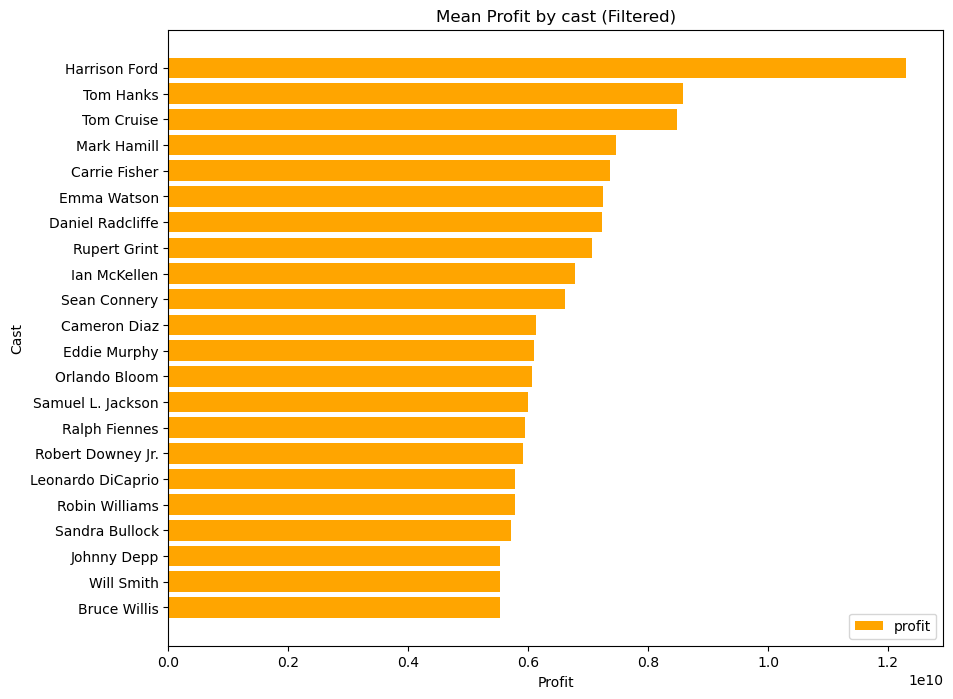

In [167]:
barh_plot('profit')

The most cast that is associated by profit is Harrison Ford

<a id='conclusions'></a>
## Conclusions

The popularity scores of the listed actors show a wide range, from Phaldut Sharma's 5.24 to Josh Helman's 28.42, indicating significant differences in levels of fame. These variations are influenced by factors such as the actors' past roles, the success of their projects, and their public image. Popularity in the entertainment industry can fluctuate over time due to changes in trends, audience preferences, and career choices made by actors. Appearing in blockbuster movies or delivering standout performances can boost an actor's popularity, making them more recognizable to audiences. However, fame in the entertainment world is subjective and varies from person to person, depending on their individual talents, personalities, and career paths. 


Looking at the profit numbers, Harrison Ford stands out as the actor who has made the most money from his movies, with over 12 billion dollars in profits. Following closely behind are Tom Cruise and Tom Hanks, both of whom have also made a lot of money from their films, with profits exceeding 8 billion dollars each. These numbers show just how influential these actors are in making movies successful at the box office.


Comparing cast popularity and profit reveals that while some popular actors may not always lead to high box office earnings, and vice versa. This happens because profitability depends on many factors like the movie's budget and audience reception, not just the actor's fame. Also, the difference in names between the two datasets could be because an actor's popularity doesn't always mean they'll bring in big profits, and some actors may make a lot of money without being very famous.


## Limitation

This has a major limitation, as the data processed above shows, 52% of the budget data is zero. This has a major impact on profit calculation. When there is no revenue, almost 65% of the profit is either zero or computed incorrectly.

## Submitting your Project 



In [188]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'TMDB-Movies.ipynb', '--to', 'html'])

[NbConvertApp] Converting notebook TMDB-Movies.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 4125227 bytes to TMDB-Movies.html


0